# Pupillometry
This notebook takes in three csv files taken from the Pupil Recordings you have exported in Pupil Player. These are:
- `annotations.csv` (contains annotations that indicates important events during the recording)
- `pupil_positions.csv` (contains raw data in regards to the pupil throughout the recording)
- `info.player.json` (contains system and sync time used to format the recording timestamps)

In [106]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import json
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# File Paths
info_player_filePath = 'source/info.player.json'
pupil_csv_filePath = 'source/pupil_positions.csv'
annotations_filepath = 'source/annotations.csv'

In [107]:
# Converting timestamps into time (starting from 0)
def convert_timestamps_to_time(df, timestamp_column, offset):
    df['time'] = df[timestamp_column] + offset
    df['time'] -= df['time'].min()
    return df

In [108]:
with open(info_player_filePath, 'r') as file:
    data = json.load(file)

start_time_synced_s = data.get('start_time_synced_s')
start_time_system_s = data.get('start_time_system_s')

offset = start_time_system_s - start_time_synced_s
print(f"Offset between system and synced start time: {offset}")

pupil_df = pd.read_csv(pupil_csv_filePath)
print(f"There is a total of {len(pupil_df)} in the Pupil DataFrame")

pupil_df = convert_timestamps_to_time(pupil_df, 'pupil_timestamp', offset)
print(pupil_df['time'])

Offset between system and synced start time: 1709032090.0733275
There is a total of 20559 in the Pupil DataFrame
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.007815
           ...    
20554    45.124087
20555    45.132714
20556    45.132714
20557    45.132865
20558    45.132865
Name: time, Length: 20559, dtype: float64


In [109]:
left_df = pupil_df[(pupil_df['eye_id'] == 0) & (pupil_df['method'] == 'pye3d 0.3.0 real-time')]
right_df = pupil_df[(pupil_df['eye_id'] == 1) & (pupil_df['method'] == 'pye3d 0.3.0 real-time')]

print(left_df)
print(right_df)

       pupil_timestamp  world_index  eye_id  confidence  norm_pos_x  \
0         17325.638794            2       0    0.860674    0.578863   
6         17325.646610            2       0    0.891163    0.578808   
8         17325.654623            2       0    0.854532    0.578575   
12        17325.662793            2       0    0.881772    0.579506   
17        17325.670575            3       0    0.768721    0.578184   
...                ...          ...     ...         ...         ...   
20540     17370.738966         3272       0    0.959717    0.575405   
20544     17370.747902         3273       0    1.000000    0.574699   
20549     17370.754962         3274       0    1.000000    0.574838   
20551     17370.762862         3275       0    0.962745    0.574478   
20555     17370.771508         3275       0    0.990270    0.574111   

       norm_pos_y   diameter                 method  ellipse_center_x  \
0        0.401561  31.821799  pye3d 0.3.0 real-time        111.141685   
6

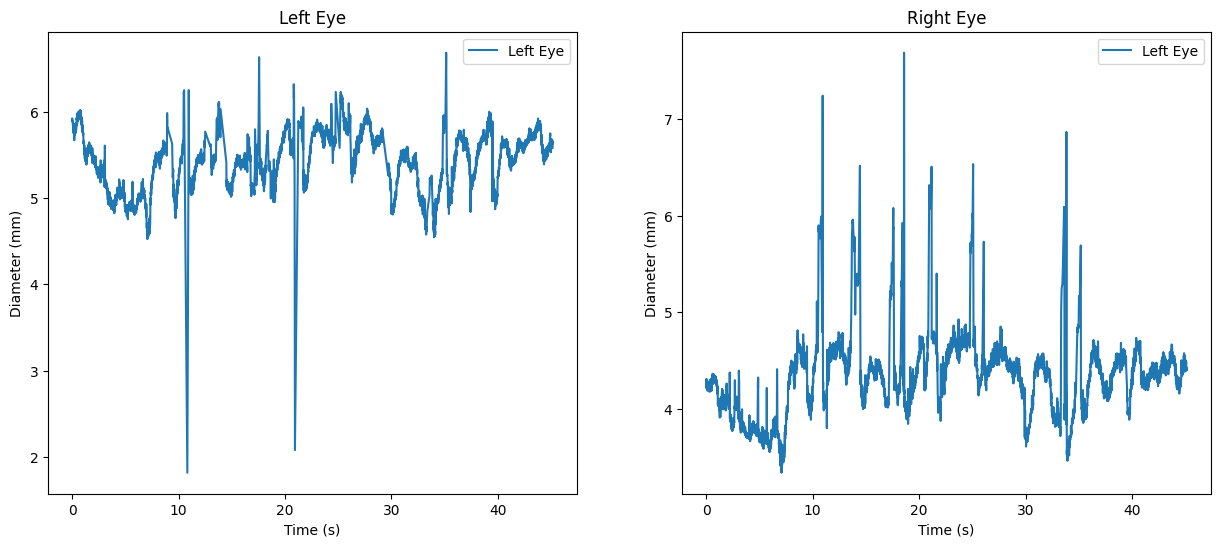

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df['time'], left_df['diameter_3d'], label='Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df['time'], right_df['diameter_3d'], label='Left Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (mm)')
    ax.legend()

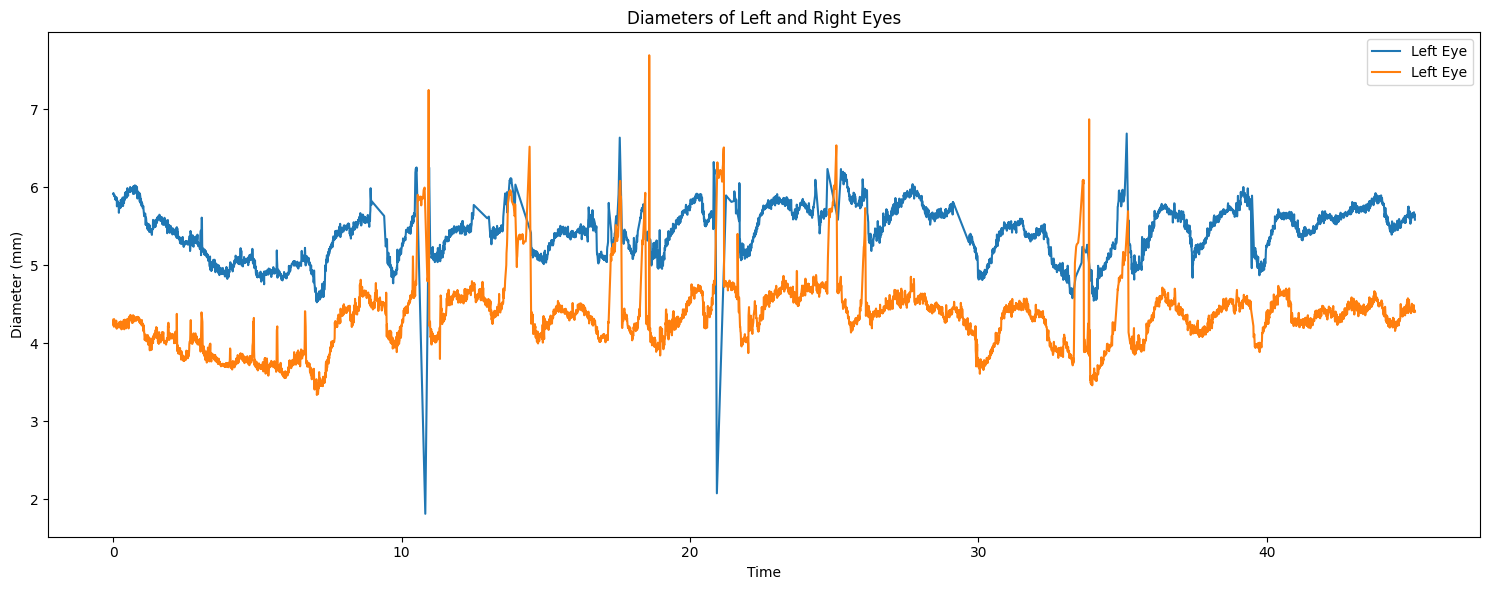

In [111]:
# Plot both smoothed diameters on the same graph
plt.figure(figsize=(15, 6))

plt.plot(left_df['time'], left_df['diameter_3d'], label='Left Eye')
plt.plot(right_df['time'], right_df['diameter_3d'], label='Left Eye')

plt.title('Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Diameter (mm)')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\jhund\AppData\Local\Temp\ipykernel_7996\1173258541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['smoothed_diameter'] = left_df['diameter_3d'].rolling(window=window).median()
C:\Users\jhund\AppData\Local\Temp\ipykernel_7996\1173258541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['smoothed_diameter'] = right_df['diameter_3d'].rolling(window=window).median()


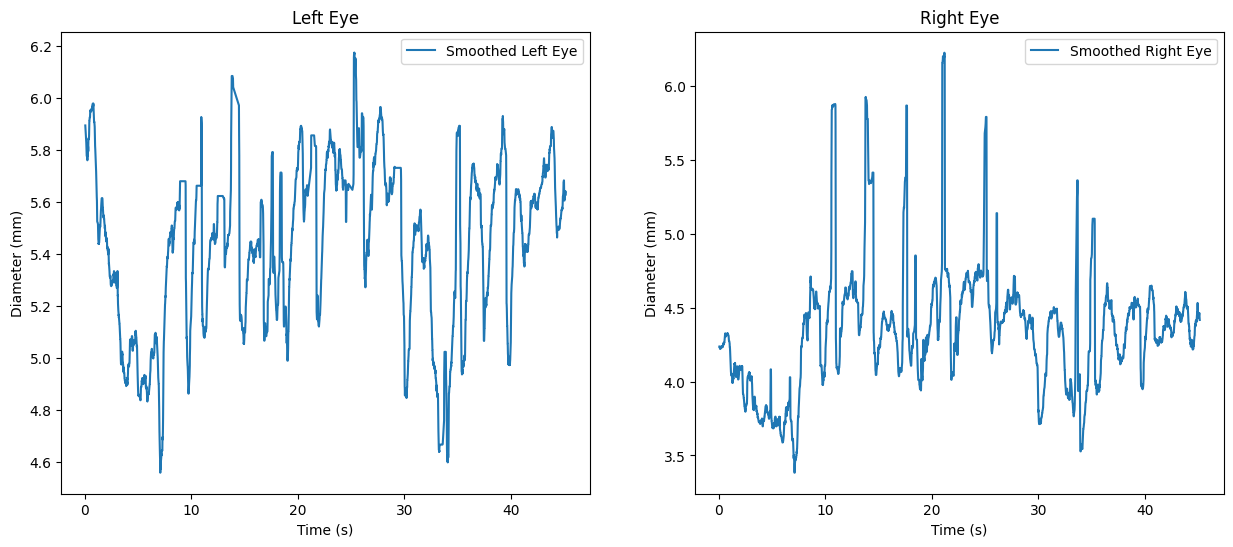

In [112]:
window = 10
left_df['smoothed_diameter'] = left_df['diameter_3d'].rolling(window=window).median()
right_df['smoothed_diameter'] = right_df['diameter_3d'].rolling(window=window).median()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df[left_df['method'] == 'pye3d 0.3.0 real-time']['time'], left_df[left_df['method'] == 'pye3d 0.3.0 real-time']['smoothed_diameter'], label='Smoothed Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df[right_df['method'] == 'pye3d 0.3.0 real-time']['time'], right_df[right_df['method'] == 'pye3d 0.3.0 real-time']['smoothed_diameter'], label='Smoothed Right Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (mm)')
    ax.legend()

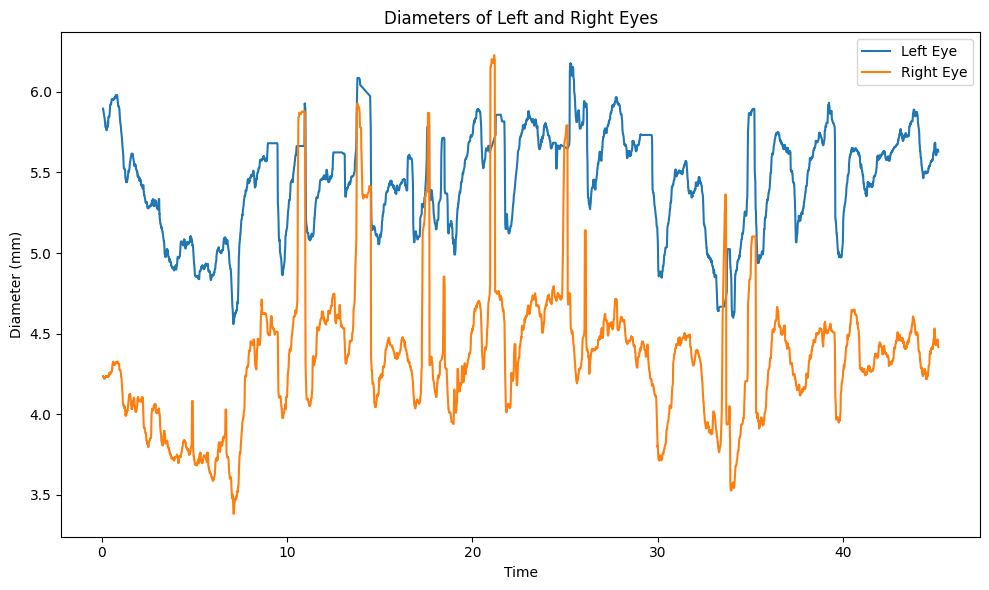

In [113]:
# Plot both smoothed diameters on the same graph
plt.figure(figsize=(10, 6))

plt.plot(left_df['time'], left_df['smoothed_diameter'], label='Left Eye')
plt.plot(right_df['time'], right_df['smoothed_diameter'], label='Right Eye')

plt.title('Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Diameter (mm)')
plt.legend()

plt.tight_layout()
plt.show()